In [1]:
# finding hand-written digits classification
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()   # load dataset from the keras to the variables

len(X_train)


11490434/11490434 [==============================] - 0s 0us/step


60000

In [2]:
(X_train[0])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

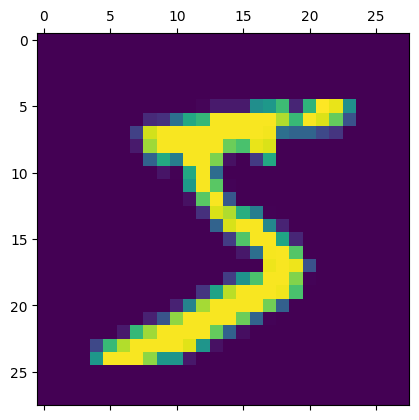

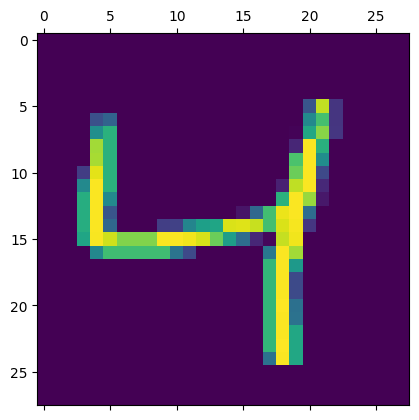

In [4]:
plt.matshow(X_train[0])   # to plot the 0 index white areas
plt.matshow(X_train[2])

In [5]:
# Now we have to flattened the grid from 2D to 1D and shape gave us 28 * 28
X_train.shape

(60000, 28, 28)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [25]:
# Now to define layers for the neural network we use the sequential function which has output and input as parameters
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

# Compile the model
model.compile(optimizer='adam',  # Adam is an optimization algorithm often used in training neural networks.
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])  # List of metrics to track during training

model.fit(X_train_flattened,y_train,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.9402 - accuracy: 0.8392
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1203 - accuracy: 0.8783
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.8218 - accuracy: 0.8836
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4861 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.4933 - accuracy: 0.8849


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.9747 - accuracy: 0.8849


[5.9747314453125, 0.8848999738693237]

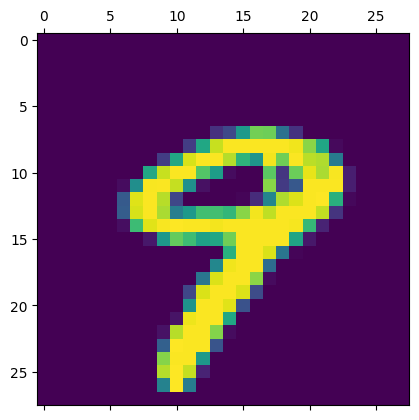

In [34]:
plt.matshow(X_test[9])   # to display the image for the prediction purpose

In [35]:
y_predicted = model.predict(X_test_flattened)   # the model to predict against the image
y_predicted[9]

313/313 [==============================] - 0s 1ms/step


array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.5187072e-20,
       1.0000000e+00, 1.1313851e-32, 0.0000000e+00, 1.0000000e+00,
       1.0000000e+00, 1.0000000e+00], dtype=float32)

In [39]:
np.argmax(y_predicted)   # the highest value index will be returned


3

In [40]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [41]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm    # will return the confusion matrix which should be in some appealing way. for that purpose use seaborn

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 976,    0,    0,    1,    3,    0,    0,    0,    0,    0],
       [  10, 1124,    1,    0,    0,    0,    0,    0,    0,    0],
       [ 199,  351,  468,    4,    8,    0,    2,    0,    0,    0],
       [ 105,  375,  312,  216,    2,    0,    0,    0,    0,    0],
       [  47,  135,  131,  189,  480,    0,    0,    0,    0,    0],
       [ 188,   69,  179,  263,   86,  105,    1,    0,    1,    0],
       [ 116,  146,  611,   18,   18,   21,   27,    0,    1,    0],
       [  30,  116,  146,  611,   62,   25,    0,   38,    0,    0],
       [  67,  412,  323,   93,   36,   31,    1,    2,    9,    0],
       [  26,  162,  106,  503,  206,    0,    0,    3,    1,    2]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

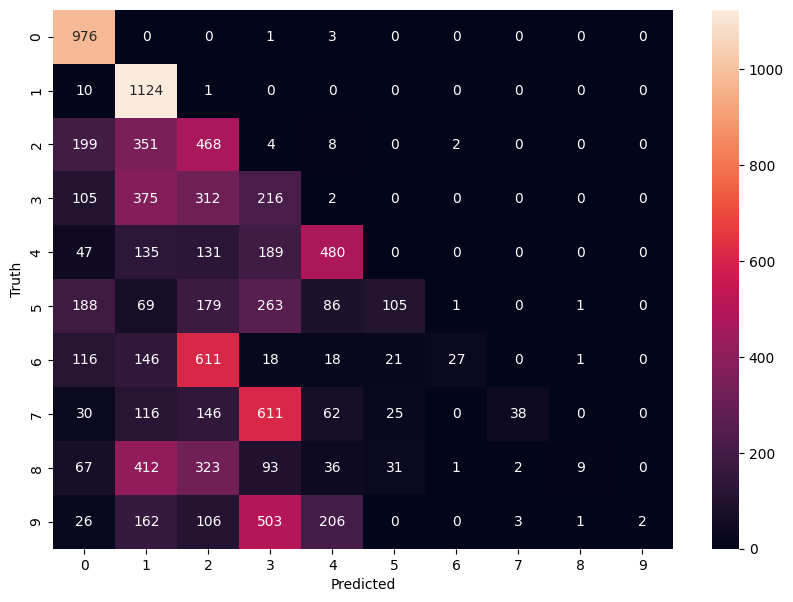

In [44]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel("Predicted")
plt.ylabel("Truth")


# New Section